# Activity 3 - Supervised Learning 1: Classification and Regression

# IMPORTS

In [1]:
# Imports
import numpy as np
import pandas as pd
import mglearn as mglearn
import matplotlib.pyplot as plt
# ensures plots are inlined for the notebook presentation
%matplotlib inline 
import scipy as sp
from scipy import stats
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
import time
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer
from IPython.display import display
import seaborn as sns

In [2]:
# Mute warnings
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

# TWO CLASSIFICATION DATASET – FORGE DATASET

X.shape: (26, 2)


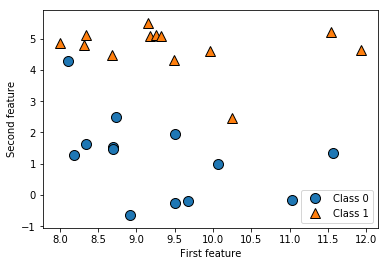

In [3]:
# Generate Dataset
import mglearn as mglearn
X, y = mglearn.datasets.make_forge()
# Plot dataset with matplotlib
mglearn.discrete_scatter(X[:, 0],X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

# WAVE DATASET

Text(0,0.5,'Target')

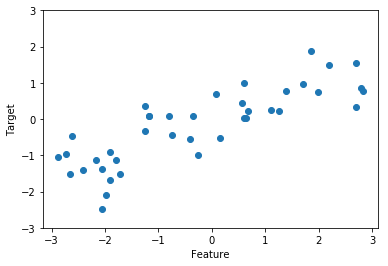

In [4]:
# Generate Dataset
X, y = mglearn.datasets.make_forge()
# Plot dataset with matplotlib
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

# WISCONSIN BREAST CANCER DATA SET

In [5]:
# Generate Dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))
print("Shape of cancer data: {}".format(cancer.data.shape))
# Use numpy
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("Feature names:\n{}".format(cancer.feature_names))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Shape of cancer data: (569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


# BOSTON HOUSING DATA SET

In [6]:
# Generate Dataset
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))
# Use mglearn
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

Data shape: (506, 13)
X.shape: (506, 104)


# K-NEAREST NEIGHBOR FOR THE FORGE DATA SET

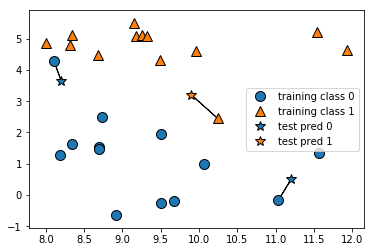

In [7]:
# Using mglearn library and one nearest neighbor
# Generate Dataset
X, y = mglearn.datasets.make_forge()
mglearn.plots.plot_knn_classification(n_neighbors=1)

# K-NEAREST NEIGHBOR FOR THE FORGE DATA SET - 3 Neighbors

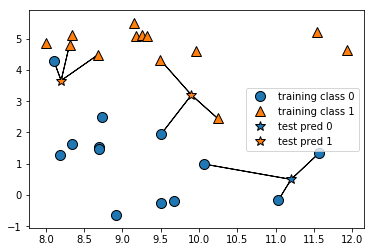

In [8]:
# Using mglearn library using three closest neighbors
# Generate Dataset
X, y = mglearn.datasets.make_forge()
mglearn.plots.plot_knn_classification(n_neighbors=3)

# K-NEAREST NEIGHBOR USING SCIKIT LEARN

In [9]:
# Generate Dataset
#from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print("test set predictions: {}".format(clf.predict(X_test)))
print("test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

test set predictions: [1 0 1 0 1 0 0]
test set accuracy: 0.86


# ANALYZING K-NEIGHBORS CLASSIFIER

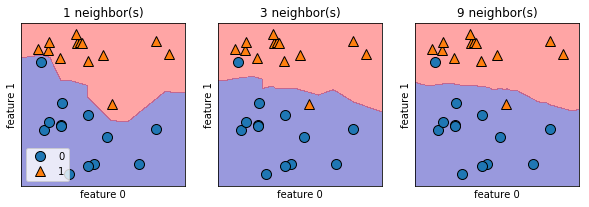

In [10]:
# Generate Dataset
# import mglearn as mglearn

X, y = mglearn.datasets.make_forge()
#import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate and fit in one line
    #from sklearn.neighbors import KNeighborsClassifier
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

# Understanding the connection between model complexity and generalization using breast cancer data

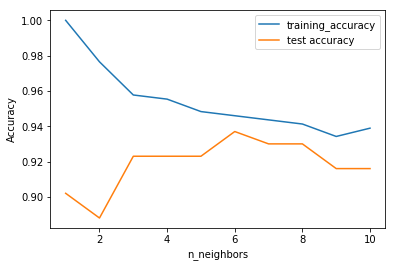

In [11]:
# Generate Dataset
#from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
#from sklearn.neighbors import KNeighborsClassifier

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # recording generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

#import matplotlib.pyplot as plt
plt.plot(neighbors_settings, training_accuracy, label = "training_accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# K-NEAREST NEIGHBORS (1) REGRESSION - WAVE DATA SET

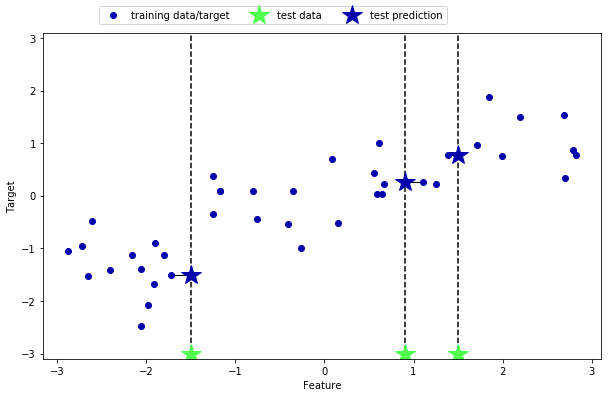

In [12]:
#Using mglearn library and one nearest neighbor
# Generate Dataset
#import mglearn as mglearn
X, y = mglearn.datasets.make_forge()
mglearn.plots.plot_knn_regression(n_neighbors=1)

# K-NEAREST NEIGHBORS (3) REGRESSION - WAVE DATA SET

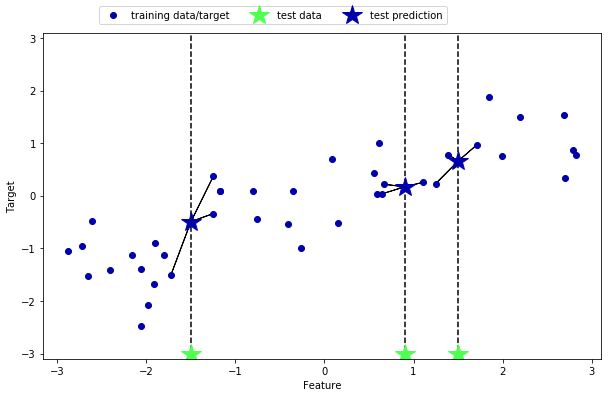

In [13]:
#Using mglearn library and one nearest neighbor
# Generate Dataset
#import mglearn as mglearn
X, y = mglearn.datasets.make_forge()
mglearn.plots.plot_knn_regression(n_neighbors=3)

# K-NEAREST NEIGHBORS USING SCIKIT

In [14]:
#Using mglearn library  and one nearest neighbor
# Generate Dataset
#import mglearn as mglearn
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
#fit the model using the training data and training targets
reg.fit(X_train, y_train)
print("Test set predictions: \n{}".format(reg.predict(X_test)))an
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set predictions: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


# ANALYZING K-NEIGHBORS REGRESSOR

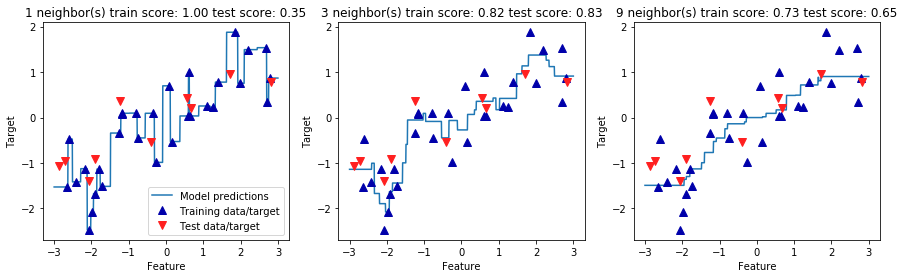

In [15]:
# Generate Dataset
#import mglearn as mglearn

#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#import matplotlib.pyplot as plt
#import numpy as np
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced  between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
            "{} neighbor(s) train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train),
             reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")

# USING SCIKIT - Coefficient, Intercept, Training & Test scores

In [16]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746
Training set score: 0.67
Test set score: 0.66


# USING LINEAR REGRESSION ON BOSTON DATA SET

In [17]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


# RIDGE REGRESSION

In [18]:
#from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


# USING ALPHA IN RIDGE MODEL - TRADEOFFS

In [19]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64
Training set score: 0.93
Test set score: 0.77


# COMPARING COEFFICIENT MAGNITUDES - RIDGE REGRESSION

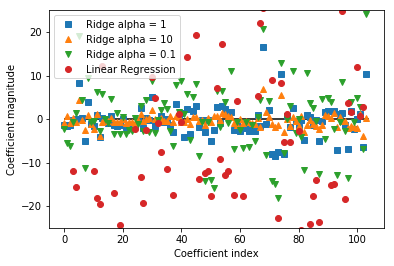

In [20]:
plt.plot(ridge.coef_, 's', label = "Ridge alpha = 1")
plt.plot(ridge10.coef_, '^', label = "Ridge alpha = 10")
plt.plot(ridge01.coef_, 'v', label = "Ridge alpha = 0.1")

plt.plot(lr.coef_, 'o', label = "Linear Regression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

# LINEAR CURVES FOR RIDGE AND LINEAR REGRESSION ON BOSTON

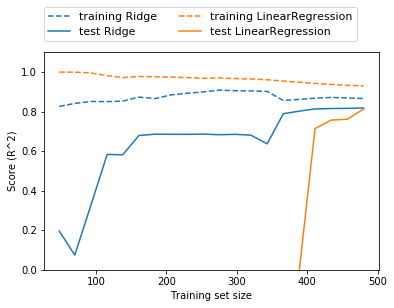

In [21]:
mglearn.plots.plot_ridge_n_samples()

# LASSO

In [22]:
#from sklearn.linear_model import Lasso
#import numpy as np
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


# LASSO (ALPHA = 0.01

In [23]:
# we increase the default setting of "max_iter"
# Otherwise the model would warn us that we should increase max_iter
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


# LASSO (ALPHA = 0.0001)

In [24]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


#  COMPARING COEFFICIENT MAGNITUDES OF LASSO WITH ALPHA & RIDGE

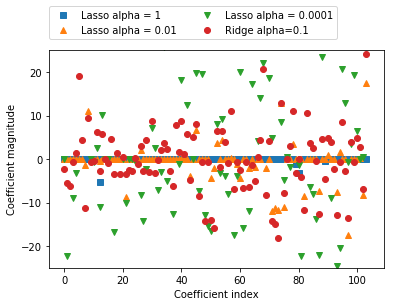

In [25]:
plt.plot(lasso.coef_, 's', label = "Lasso alpha = 1")
plt.plot(lasso001.coef_, '^', label = "Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, 'v', label = "Lasso alpha = 0.0001")

plt.plot(ridge01.coef_, 'o', label = "Ridge alpha=0.1")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))

# COMPARING SUPPORT VECTOR MACHINE AND LOGISTIC REGRESSION

C:\Users\kpfeif200\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


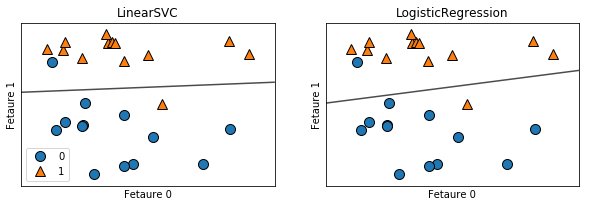

In [26]:
# Generate Dataset
#import mglearn as mglearn
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import LinearSVC
#import matplotlib.pyplot as plt
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Fetaure 0")
    ax.set_ylabel("Fetaure 1")
axes[0].legend()

# REGULARIZATION

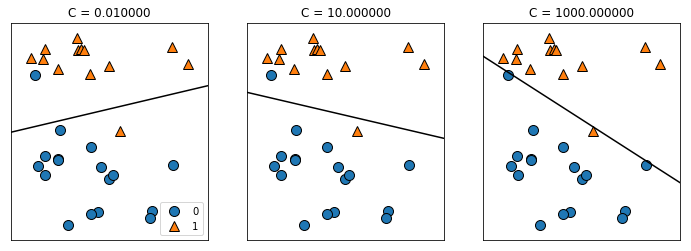

In [27]:
mglearn.plots.plot_linear_svc_regularization()
#The higher the value of C is, the harder the algorithm tries to fit individual points leading to overfitting.

# ANALYZING LOGISTIC REGRESSION - PART 1

In [28]:
#from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
#import matplotlib.pyplot as plt
#from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.958


# ANALYZING LOGISTIC REGRESSION - PART 2 - INCREASING C

In [29]:
# increasing C to fit a more flexible model
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


# ANALYZING LOGISTIC REGRESSION - PART 3 - SETTING C=0.01

In [30]:
# Setting C = 0.01
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


# ANALYZING LOGISTIC REGRESSION - COEFFICIENT MAGNITUDE

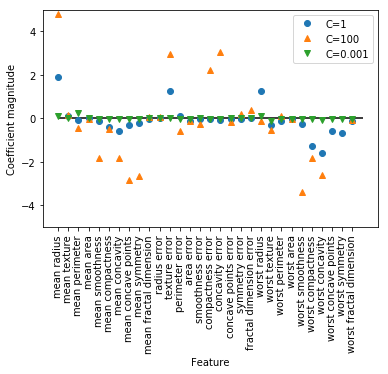

In [31]:
plt.plot(logreg.coef_.T, 'o', label = "C=1")
plt.plot(logreg100.coef_.T, '^', label = "C=100")
plt.plot(logreg001.coef_.T, 'v', label = "C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

# ANALYZING LOGISTIC REGRESSION USING L1 REGULARIZATION

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


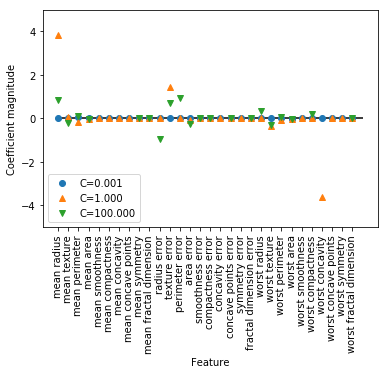

In [32]:
# Using L1 regularization
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label = "C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend(loc=3)

# APPLYING SVC TO THREE CLASSIFICATIONS

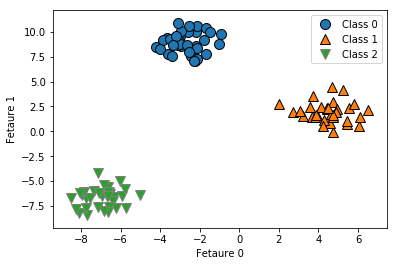

In [33]:
# Generate Dataset
#import mglearn as mglearn
#from sklearn.datasets import make_blobs
#from sklearn.svm import LinearSVC
#import matplotlib.pyplot as plt
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Fetaure 0")
plt.ylabel("Fetaure 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

# TRAINING LINEAR SVC CLASSIFIER ON THE DATA SET

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


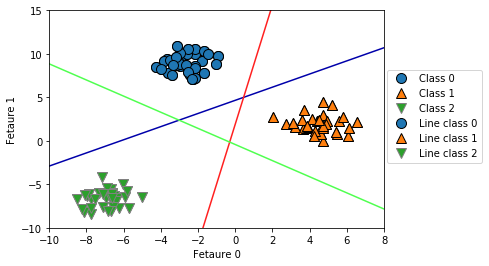

In [34]:
# Generate Dataset
#import mglearn as mglearn
#from sklearn.datasets import make_blobs
#from sklearn.svm import LinearSVC
#import matplotlib.pyplot as plt
#import numpy as np
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Fetaure 0")
plt.ylabel("Fetaure 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
linear_svm = LinearSVC().fit(X, y)
print ("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Fetaure 0")
plt.ylabel("Fetaure 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))

# PREDICTION OF THE SVC CLASSIFIER FOR THE DATA SET

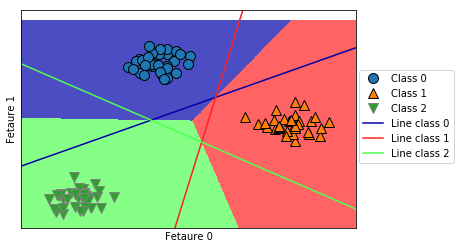

In [35]:
# Generate Dataset
#import mglearn as mglearn
#from sklearn.datasets import make_blobs
#from sklearn.svm import LinearSVC
#import matplotlib.pyplot as plt
#import numpy as np
X, y = make_blobs(random_state=42)
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Fetaure 0")
plt.ylabel("Fetaure 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))

# NAIVE-BAYES CLASSIFIERS

In [36]:
#A simple BernoulliNB classifier to count how often every feature of each class is not zero.
#import numpy as np
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y= np.array([0, 1, 0, 1])
# 4 data points with 4 binary features each
# Two classes 0 and 1

counts = {}
for label in np.unique(y):
    # iterate over each class
    #count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts: \n{}".format(counts))

Feature counts: 
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


# WORKING WITH TITANIC DATA SET

In [37]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import time
#from sklearn.model_selection import train_test_split
#from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# Importing dataset
data = pd.read_csv('C:/Users/kpfeif200/OneDrive - Comcast/VI Admin/SJU/DSS 740 Analytics w Machine Learning/Module 3 Supervised ML Part 1/kaggle-titanic-master/kaggle-titanic-master/input/Titanic-train.csv')

# Convert categorical variable to numeric
data["Sex_cleaned"]=np.where(data["Sex"]=="male",0,1)
data["Embarked_cleaned"]=np.where(data["Embarked"]=="S",0,
                                  np.where(data["Embarked"]=="C",1,
                                           np.where(data["Embarked"]=="Q",2,3)
                                          )
 )

# Cleaning dataset for NaN
data=data[[
    "Survived",
    "Pclass",
    "Sex_cleaned",
    "Age",
    "SibSp",
    "Parch",
    "Fare",
    "Embarked_cleaned"
]].dropna(axis=0, how='any')

# Split dataset in training and test datasets
X_train, X_test = train_test_split(data, test_size=0.5, random_state=int(time.time()))

# WORKING WITH THE CLASSIFIER

In [38]:
# Instantiate the classifier
gnb = GaussianNB()
used_features =[
    "Pclass",
    "Sex_cleaned",
    "Age",
    "SibSp",
    "Parch",
    "Fare",
    "Embarked_cleaned"
]

# Train classifier
gnb.fit(
    X_train[used_features].values,
    X_train["Survived"]
)
y_pred = gnb.predict(X_test[used_features])

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["Survived"] != y_pred).sum(),
          100*(1-(X_test["Survived"] != y_pred).sum()/X_test.shape[0])
))

Number of mislabeled points out of a total 357 points : 83, performance 76.75%


# ILLUSTRATION WITH 1 FEATURE - FARE DATA - SURVIVAL PROBABILITIES

In [39]:
mean_survival=np.mean(X_train["Survived"])
mean_not_survival=1-mean_survival
print("Survival prob = {:03.2f}%, Not survival prob = {:03.2f}%"
      .format(100*mean_survival,100*mean_not_survival))

Survival prob = 40.62%, Not survival prob = 59.38%


# MEAN AND SD OF THE FARE DATA SETS - SURVIVAL VALUES

In [40]:
mean_fare_survived = np.mean(X_train[X_train["Survived"]==1]["Fare"])
std_fare_survived = np.std(X_train[X_train["Survived"]==1]["Fare"])
mean_fare_not_survived = np.mean(X_train[X_train["Survived"]==0]["Fare"])
std_fare_not_survived = np.std(X_train[X_train["Survived"]==0]["Fare"])

print("mean_fare_survived = {:03.2f}".format(mean_fare_survived))
print("std_fare_survived = {:03.2f}".format(std_fare_survived))
print("mean_fare_not_survived = {:03.2f}".format(mean_fare_not_survived))
print("std_fare_not_survived = {:03.2f}".format(std_fare_not_survived))

mean_fare_survived = 51.26
std_fare_survived = 72.43
mean_fare_not_survived = 22.05
std_fare_not_survived = 25.94
